In [39]:
from sklearn.datasets import make_blobs, make_classification
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

import nltk
from nltk import sent_tokenize, word_tokenize
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer

from wordcloud import WordCloud
from stop_words import get_stop_words
import string
import re

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *


import nltk
from nltk import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
from nltk.probability import FreqDist

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lisaf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lisaf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Objectives:
#1) learn how to analyse content and apply it to open science
#2) learn how to put work on github
#3) read articles about how to write clean code, try to apply it 

In [16]:
data=pd.read_csv("tweets_climate_2020_complete.csv", index_col='index')
data.head()

,Unnamed: 0,url,created_at,text,_id,links,reply_count,retweet_count,favorite_count,quoteCount,...,source_name,media,collected_via,retweet,user_screen_name,quoted_id,quoted_user_id,mentions_names,mentions_ids,hashtags
index,,,,,,,,,,,,,,,,,,,,,
0,0,https://twitter.com/LeipzigSyd/status/12233949...,2020-01-31 23:57:47+00:00,#Canberra suburbs and hundreds of lives at ris...,1.223395e+18,https://www.theguardian.com/australia-news/liv...,2.0,5.0,6.0,0.0,...,Twitter for Android,NaN,scraping,False,LeipzigSyd,NaN,NaN,NaN,NaN,canberra|bushfires|nsw|act|victoria|coal|gas|a...
1,1,https://twitter.com/5minofscience/status/12233...,2020-01-31 23:55:45+00:00,Another consequence of climate change: Dozens ...,1.223394e+18,https://www.theweathernetwork.com/ca/news/arti...,0.0,1.0,0.0,0.0,...,Twitter for Android,NaN,scraping,False,5minofscience,NaN,NaN,NaN,NaN,climatechange|climate|environment|coronoraviru...
2,2,https://twitter.com/Cameron_Diver/status/12233...,2020-01-31 23:49:44+00:00,#Climate breakdown 'is increasing #ViolenceAga...,1.223393e+18,https://www.theguardian.com/environment/2020/j...,0.0,2.0,10.0,0.0,...,Twitter for iPhone,NaN,scraping,False,Cameron_Diver,NaN,NaN,NaN,NaN,climate|violenceagainstwomen|vawg|climatechang...
3,3,https://twitter.com/PlantBasedNews/status/1223...,2020-01-31 23:48:01+00:00,'If a private plane is really the most cost-ef...,1.223393e+18,https://www.plantbasednews.org/news/environmen...,2.0,5.0,22.0,1.0,...,Buffer,NaN,scraping,False,PlantBasedNews,NaN,NaN,NaN,NaN,climate
4,4,https://twitter.com/Bec_Carman/status/12233893...,2020-01-31 23:35:35+00:00,@TerrySquibb1 @marketmodel @jimcramer @Sameera...,1.223389e+18,NaN,3.0,0.0,0.0,0.0,...,Twitter Web App,[{'previewUrl': 'https://pbs.twimg.com/media/E...,scraping,False,Bec_Carman,NaN,NaN,terrysquibb1|marketmodel|jimcramer|sameerasava...,2924967512|21917683|14216123|557109347,fossilfuels|climate


In [17]:
data=data.drop(columns=['Unnamed: 0'])

In [18]:
data.head()

,url,created_at,text,_id,links,reply_count,retweet_count,favorite_count,quoteCount,conversationId,...,source_name,media,collected_via,retweet,user_screen_name,quoted_id,quoted_user_id,mentions_names,mentions_ids,hashtags
index,,,,,,,,,,,,,,,,,,,,,
0,https://twitter.com/LeipzigSyd/status/12233949...,2020-01-31 23:57:47+00:00,#Canberra suburbs and hundreds of lives at ris...,1.223395e+18,https://www.theguardian.com/australia-news/liv...,2.0,5.0,6.0,0.0,1.223395e+18,...,Twitter for Android,NaN,scraping,False,LeipzigSyd,NaN,NaN,NaN,NaN,canberra|bushfires|nsw|act|victoria|coal|gas|a...
1,https://twitter.com/5minofscience/status/12233...,2020-01-31 23:55:45+00:00,Another consequence of climate change: Dozens ...,1.223394e+18,https://www.theweathernetwork.com/ca/news/arti...,0.0,1.0,0.0,0.0,1.223394e+18,...,Twitter for Android,NaN,scraping,False,5minofscience,NaN,NaN,NaN,NaN,climatechange|climate|environment|coronoraviru...
2,https://twitter.com/Cameron_Diver/status/12233...,2020-01-31 23:49:44+00:00,#Climate breakdown 'is increasing #ViolenceAga...,1.223393e+18,https://www.theguardian.com/environment/2020/j...,0.0,2.0,10.0,0.0,1.223393e+18,...,Twitter for iPhone,NaN,scraping,False,Cameron_Diver,NaN,NaN,NaN,NaN,climate|violenceagainstwomen|vawg|climatechang...
3,https://twitter.com/PlantBasedNews/status/1223...,2020-01-31 23:48:01+00:00,'If a private plane is really the most cost-ef...,1.223393e+18,https://www.plantbasednews.org/news/environmen...,2.0,5.0,22.0,1.0,1.223393e+18,...,Buffer,NaN,scraping,False,PlantBasedNews,NaN,NaN,NaN,NaN,climate
4,https://twitter.com/Bec_Carman/status/12233893...,2020-01-31 23:35:35+00:00,@TerrySquibb1 @marketmodel @jimcramer @Sameera...,1.223389e+18,NaN,3.0,0.0,0.0,0.0,1.223370e+18,...,Twitter Web App,[{'previewUrl': 'https://pbs.twimg.com/media/E...,scraping,False,Bec_Carman,NaN,NaN,terrysquibb1|marketmodel|jimcramer|sameerasava...,2924967512|21917683|14216123|557109347,fossilfuels|climate


In [19]:
#creating a personalized list of stopwords

stopwords=get_stop_words('english')
stopwords.append('https')
stopwords.append('t')
stopwords.append('co')
stopwords.append('climate')
stopwords.append('u')
stopwords.append('https')


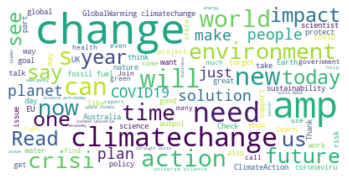

In [20]:
#extract datas

texttweet = " ".join(review for review in data.text)

#create a wordcloud of the most used words in the tweets

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(texttweet)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [22]:
#tokenize the text by sentences
sentences = sent_tokenize(texttweet)
print (len(sentences))

335717


In [23]:
#tokenize the text with words
words= word_tokenize(texttweet) 
print(len(words))

11295623


In [24]:
#create a list of the most frequent words and their frequency

longwords=[]
for m in words: 
    if len(m) > 4: 
        longwords.append(m)

clean_words=[]
for w in longwords: 
    if w not in stopwords:
        clean_words.append(w)
fdisttweet= FreqDist(clean_words)

fdisttweet.most_common(20)

#change, action and crisis come in the most told words. That is important.

[('Climate', 80583),
 ('change', 31857),
 ('climatechange', 23368),
 ('energy', 18464),
 ('ClimateChange', 15891),
 ('environment', 14941),
 ('ClimateAction', 13008),
 ('world', 12663),
 ('science', 11447),
 ('emissions', 10868),
 ('action', 10683),
 ('crisis', 10601),
 ('global', 9985),
 ('carbon', 9883),
 ('people', 9647),
 ('future', 9286),
 ('weather', 8412),
 ('ClimateCrisis', 8140),
 ('nature', 7940),
 ('years', 7649)]

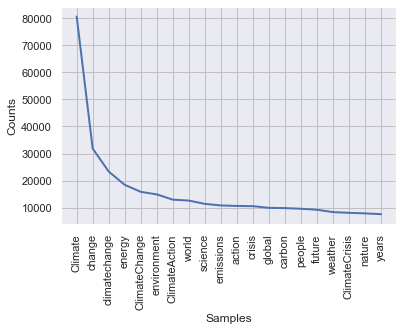

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
#visual representation

fdisttweet.plot(20)

In [149]:
#understand stemmer

porter= PorterStemmer()

for w in word_tokenize(texttweet) :
    if len(w) > 4: 
        print(porter.stem(w))
    else: 
        pass 

#there are too much informations here: it would usefull to find a way to find the important porters

eal
donor
australian
climat
scienc
denial
promot
institut
public
affair
http
//t.co/eqhacq2ehc
climat
worst
tbthursday
could
affect
climat
http
//t.co/v0uosq8hsc
impact
mental
health
impact
creativ
relationship
build
these
thing
happen
easier
natur
without
phone
philginsburgsf
climat
archiv
http
//t.co/q4mr274yov
natur
mentalhealth
climat
http
//t.co/i3vzgqwqg
proveg_int
global
awar
organis
urg
starbuck
surcharg
plantbas
milk
seriou
about
achiev
climat
target
http
//t.co/fjb7bxsrhc
http
//t.co/5ixpgdlovj
central
bank
remit
ensur
financi
stabil
howev
stabil
increasingli
impact
climatechang
central
bank
ensur
their
prepar
climat
chang
futur
dile_o
http
//t.co/fgube7ipyw
sustainablefin
karaswish
doubl
climat
reiter
predict
those
climat
space
great
fortun
carbontech
carbonremov
climat
circulareconomi
http
//t.co/t7abjyhpqt
feder
emerg
manag
agenc
issu
polici
outlin
feder
fund
post-disast
rebuild
project
ensur
greater
resili
http
//t.co/rmrgrsgqug
disasteraid
constructionnew
climat
construc

KeyboardInterrupt: 

2199.0


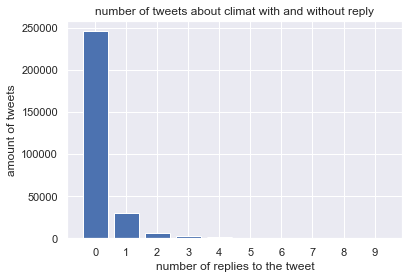

In [80]:

#Replies to tweets: we can observe that there are less tweets with not reply than with reply

reply_count=data['reply_count']
print(reply_count.max())
fdistreply= FreqDist(reply_count)

plt.bar(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'], [245834, 30248, 5764, 2094, 1133,653, 471 , 345, 243, 200])
plt.title("number of tweets about climat with and without reply")
plt.xlabel("number of replies to the tweet")
plt.ylabel("amount of tweets")

plt.show()

5297.0


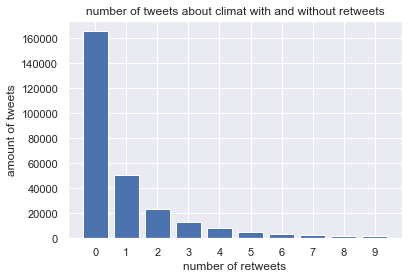

In [77]:
#Retweets: we can observe that there are less tweets with not retweet than with retweet

reply_count=data['retweet_count']
print(reply_count.max())
fdistretweet= FreqDist(reply_count)

plt.bar(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'], [165567, 50560, 23575,12909, 8044, 5305, 3598, 2689, 2065, 1636])
plt.title("number of tweets about climat with and without retweets")
plt.xlabel("number of retweets")
plt.ylabel("amount of tweets")

plt.show()

525.0


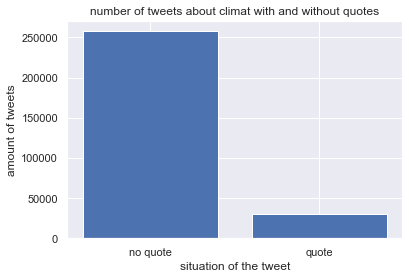

In [35]:
#Quoting: we can observe that there are less tweets with not quoting other people than with quoting

reply_count=data['quoteCount']
print(reply_count.max())
fdistquote= FreqDist(reply_count)

plt.bar(['no quote','quote'], [257784, 30565])
plt.title("number of tweets about climat with and without quotes")
plt.xlabel("situation of the tweet")
plt.ylabel("amount of tweets")

plt.show()


9415.0


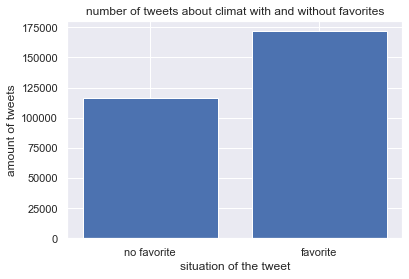

In [41]:
#Favorites: we can observe that there are less tweets with not favorite than with favorite: that is interesting. Looking at the other graphics, that's the only place where the ratio is different. We can conclude that about climat change, people don't retweet or reply, but favorite. 

#More tweets with favorites than without favorites
reply_count=data['favorite_count']
print(reply_count.max())
fdistfavorite= FreqDist(reply_count)


plt.bar(['no favorite','favorite'], [116566, 171783])
plt.title("number of tweets about climat with and without favorites")
plt.xlabel("situation of the tweet")
plt.ylabel("amount of tweets")

plt.show()

Text(0, 0.5, 'amount of favorites')

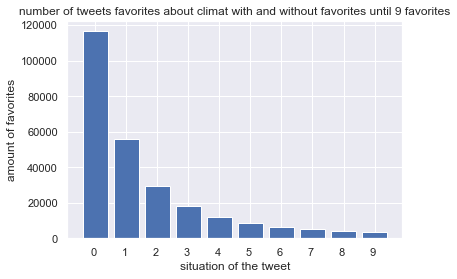

In [71]:

plt.bar(['0 ','1 ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 '], [116566, 56021,29362, 18013, 12223, 8716, 6560, 5248, 4203, 3328])
plt.title("number of tweets favorites about climat with and without favorites until 9 favorites")
plt.xlabel("number of favorites")
plt.ylabel("amount of favorites")

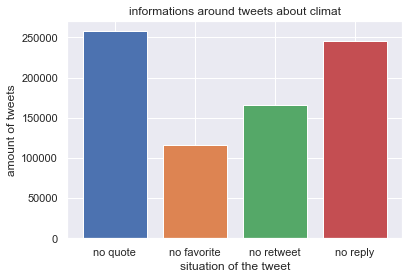

<Figure size 3600x3600 with 0 Axes>

In [83]:
#try putting them together
plt.bar(['no quote'], [257784])
plt.bar(['no favorite'], [116566])
plt.bar(['no retweet'],[165567])
plt.bar(['no reply'],[245834])

plt.title("informations around tweets about climat")
plt.xlabel("situation of the tweet")
plt.ylabel("amount of tweets")
plt.figure(figsize=(50, 50))

plt.show()


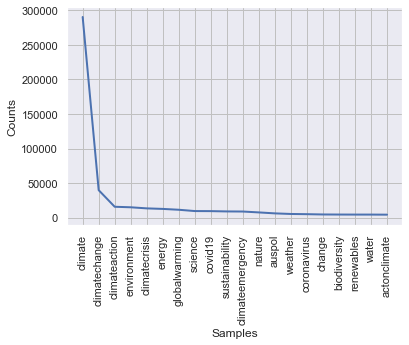

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
#most mentionned hashtags. We can observe those hashtags are very close to the words used in the tweets.

hashtags = " ".join(str(review) for review in data.hashtags).replace("|", " ")
words= word_tokenize(hashtags) 
fdisthashtags=FreqDist(words)
fdisthashtags.most_common(20)
fdisthashtags.plot(20)

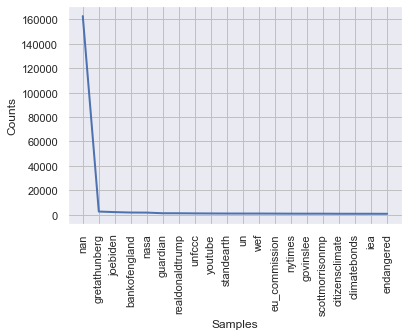

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
#most mentionned people and the number of tweets without mentions

mentionnedpeople = " ".join(str(review) for review in data.mentions_names).replace("|", " ")
wordsmp= word_tokenize(mentionnedpeople) 
fdistmp=FreqDist(wordsmp)
fdistmp.most_common(20)
fdistmp.plot(20)

#most of the tweets are unmentionned: they adress to everyone, they don't concern particular people, include jokes and opinions probably

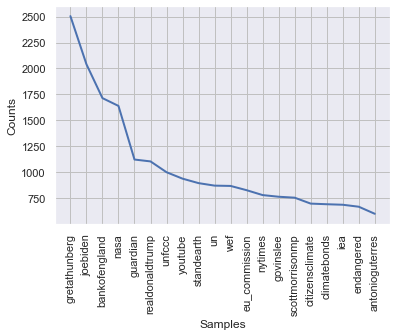

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [92]:
#The first is gretathunberg, the most famous ecology defenser, and the second is the president of the USA, there is ex-twitter count of donald trump and other big politicians two (ex: antio guterres in portugual). but they mention the NASA and the bank of england two, why?

#-bank of england tweeted this in 2019: Climate change poses a risk to the stability of the UK’s financial system. To ensure firms are prepared, we will carry out a climate stress test in 2021. Read about our plans and tell us what you think: - that can explain
#-Nasa: they created a special nasa twitter account for the global climate situation - that can explain

mentionnedpeople = " ".join(str(review) for review in data.mentions_names).replace("|", " ")
mentionnedpeoplewmp=mentionnedpeople.replace('nan', '')

wordsmpwn= word_tokenize(mentionnedpeoplewmp) 
fdistmpwn=FreqDist(wordsmpwn)
fdistmpwn.most_common(20)
fdistmpwn.plot(20)




#Prbl: i had trouble creating plot based on frequencies. 